# KNN
 The KNN algorithm can be summarized by the following steps:
 1. Choose the number of k and a distance metric
 2. Find the k-nearest neighbors of the data record that we want to classify
 3. Assign the class label by majority vote

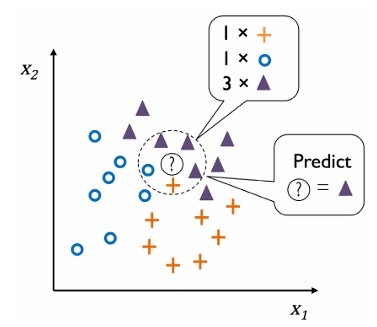

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

Read data from the data set **wisc_bc_data.csv**

[Data description](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

* view the set
* give the distributions of the variables
* check for missing data

In [2]:
wbcd = pd.read_csv('../content/wisc_bc_data.csv')
wbcd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Check for missing values
wbcd.isna().sum() # analog to .isnull()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Target variable

In [4]:
wbcd.diagnosis.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [5]:
wbcd.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='diagnosis', ylabel='count'>

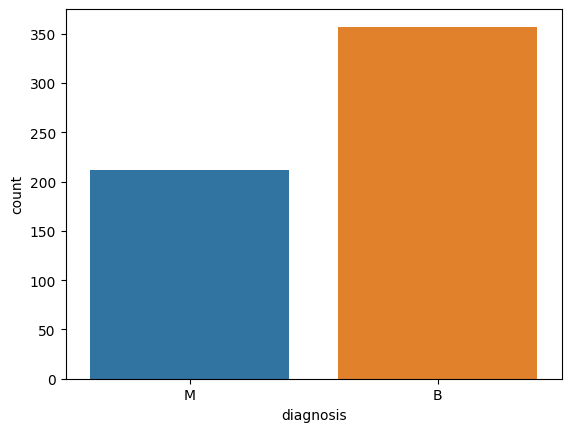

In [6]:
sns.countplot(x= "diagnosis",data= wbcd, hue="diagnosis")

In [7]:
columns = wbcd.columns
X = wbcd[columns[2:32]]
y = wbcd.diagnosis


## Data Preparation

* Train test split (Holdout Method) is a model validation procedure that allows us to simulate how a model would perform on new/unseen data.
*  In practice, the most commonly used splits are 60:40, 70:30, or 80:20, depending on the size of the initial dataset.
* However, for large datasets, 90:10 or 99:1 splits are also common and appropriate.

For example, if the dataset contains more than 100,000 training examples, it might be fine to withhold only 10,000 examples for testing in order to get a good estimate of the generalization performance.

In [8]:
from sklearn.model_selection import train_test_split

#random_state is used to reproduce the same results in every run. 
# It changes the way the data is split in sets of training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
y_train.value_counts(normalize=True)

diagnosis
B    0.625628
M    0.374372
Name: proportion, dtype: float64

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() # Object of the class StandardScaler
X_train = sc.fit_transform(X_train) # fit_transform() method fits to the data and then transforms it.
X_test = sc.fit_transform(X_test)

## Model

In [11]:
# knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
# training model
classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

## Prediction

In [12]:
# prediction
y_pred= classifier.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluating the Model

In [13]:
from sklearn.metrics import accuracy_score
# ACC
print(accuracy_score(y_test,y_pred))

0.9649122807017544


[[106   2]
 [  4  59]]


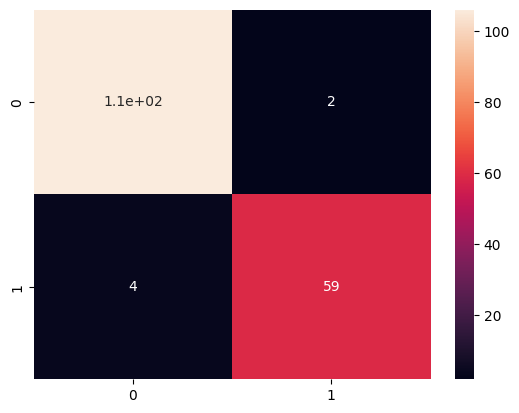

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
#plt.savefig('confusion_Matrix.png')
print(cm)

# The optimal number of neighbors
 The right choice of k is crucial to finding a good balance between overfitting and underfitting.

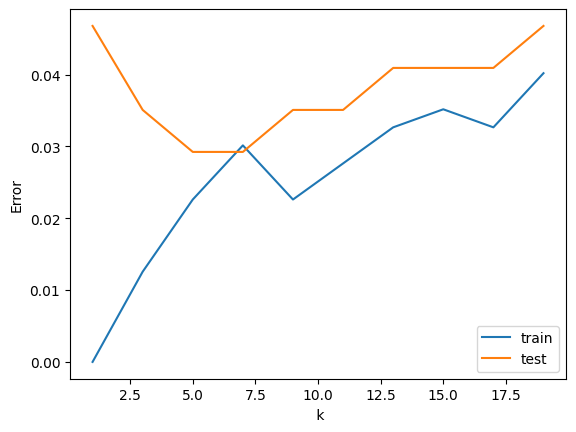

In [15]:
error1= []
error2= []

for k in range(1,21,2):
    knn= KNeighborsClassifier(k)
    knn.fit(X_train, y_train)

    y_pred1= knn.predict(X_train)
    y_pred2= knn.predict(X_test)
    
    error1.append(np.mean(y_train != y_pred1))
    error2.append(np.mean(y_test != y_pred2))

plt.plot(range(1,21,2), error1, label="train")
plt.plot(range(1,21,2), error2, label="test")
plt.xlabel(' k')
plt.ylabel('Error')
plt.legend()

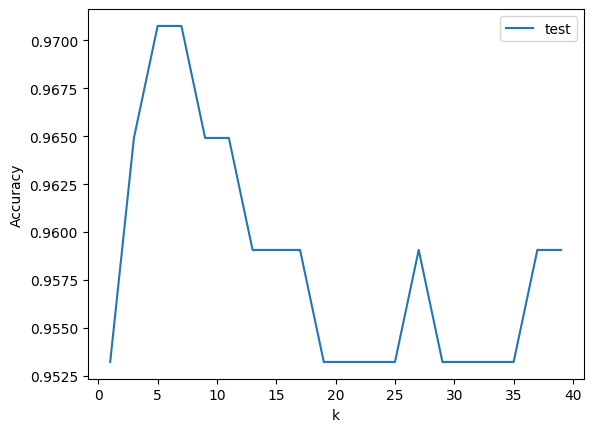

In [16]:
accuracy_rate =[]

for k in range(1,40,2):
    cl= KNeighborsClassifier(k)
    cl.fit(X_train,y_train)
    y_pred= cl.predict(X_test)
    score= accuracy_score(y_test
    ,y_pred)
    accuracy_rate.append(score)

plt.plot(range(1,40,2), accuracy_rate, label="test")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [17]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))


0.9707602339181286


In [18]:
confusion_matrix(y_pred,y_test)

array([[106,   3],
       [  2,  60]])

* KNN is very susceptible to overfitting due to the curse of dimensionality.
* The **curse of dimensionality**  describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.
* We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.

## Distance metric - remark
Choosing the right distance metric that is appropriate for the features in the dataset.
Often, a simple Euclidean distance measure is used for real-value examples. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance.

 The minkowski distance is just a generalization of
the Euclidean and Manhattan distance, which can be written as follows:
$$ d(x^{(i)},x^{(j)})=\sqrt[p]{\sum_k |x^{(i)}_k-x^{(j)}_k|^p}$$
 It becomes the Euclidean distance if we set the parameter p=2 or the Manhattan distance at p=1.

In [19]:
classiferm = KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9707602339181286


# Task

For a dataset of voice.csv, build a kNN model. The target variable is 'label'. 

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

target_variable= 'label'
data= pd.read_csv('../content/voice.csv')
data


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [21]:
# Check for missing values
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [22]:
# Some statistics
data[target_variable].describe()

count     3168
unique       2
top       male
freq      1584
Name: label, dtype: object

In [23]:
X= data[data.columns[:-1]]
y= data[target_variable]
# Preparing sets of training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Scaling the data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

Optimal number of neighbors:  3


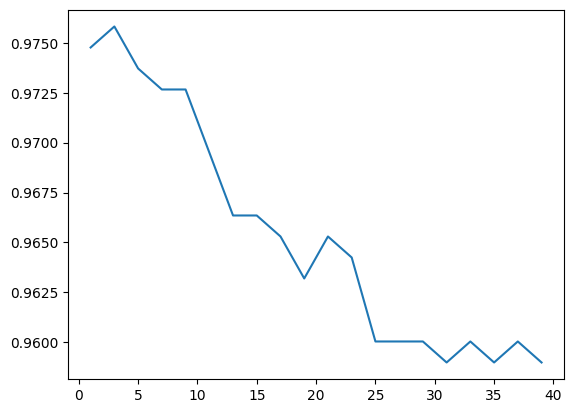

In [24]:
# Finding optimal number of neighbors
accuracy_rate = []
for k in range(1,40,2):
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred= classifier.predict(X_test)
    score= accuracy_score(y_test,y_pred)
    accuracy_rate.append(score)

plt.plot(range(1,40,2), accuracy_rate, label="test")

# Obtaining the optimal number of neighbors
k= 2*accuracy_rate.index(max(accuracy_rate)) +1 
print("Optimal number of neighbors: ", k)


In [25]:
# Constructing the model
knn= KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

# Evaluating the model
score= accuracy_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)

print("Prediction:\n",y_pred,"\n")
print("Score: ",score,"\n")
print("Confusion Matrix:\n",cm,"\n")

Prediction:
 ['female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'ma